In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [2]:
N = 100
X = np.random.random(N) * 6 - 3
y = 0.5 * X - 1 + np.random.randn(N) * 0.5 

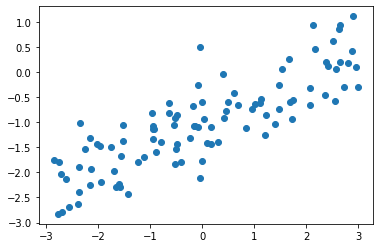

In [3]:
plt.scatter(X, y);

In [4]:
#build model
i = Input(shape=(1,))
x = Dense(1)(i)

model = Model(i, x)

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(
  loss='mse',
  # optimizer='adam',
  optimizer=Adam(learning_rate=0.1),
  metrics=['mae']
)

In [7]:
r = model.fit(
    X.reshape(-1, 1), y,
    epochs = 200,
    batch_size = 32,
)

Epoch 1/200
4/4 [==============================] - 1s 6ms/step - loss: 1.5543 - mae: 1.0310
Epoch 2/200
4/4 [==============================] - 0s 4ms/step - loss: 0.5128 - mae: 0.6063
Epoch 3/200
4/4 [==============================] - 0s 3ms/step - loss: 0.3767 - mae: 0.4832
Epoch 4/200
4/4 [==============================] - 0s 3ms/step - loss: 0.3585 - mae: 0.4637
Epoch 5/200
4/4 [==============================] - 0s 2ms/step - loss: 0.3255 - mae: 0.4529
Epoch 6/200
4/4 [==============================] - 0s 2ms/step - loss: 0.3273 - mae: 0.4573
Epoch 7/200
4/4 [==============================] - 0s 2ms/step - loss: 0.3014 - mae: 0.4383
Epoch 8/200
4/4 [==============================] - 0s 2ms/step - loss: 0.2526 - mae: 0.4085
Epoch 9/200
4/4 [==============================] - 0s 6ms/step - loss: 0.2403 - mae: 0.4031
Epoch 10/200
4/4 [==============================] - 0s 2ms/step - loss: 0.2544 - mae: 0.4204
Epoch 11/200
4/4 [==============================] - 0s 2ms/step - loss: 0.2485 

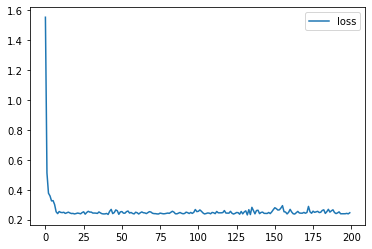

In [8]:
# plot loss per iteration
plt.plot(r.history['loss'], label = 'loss')
plt.legend();

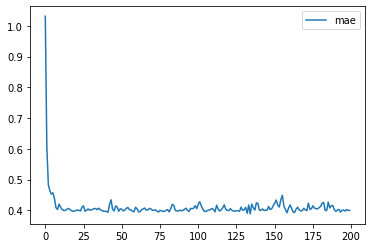

In [9]:
# plot mae per iteration
plt.plot(r.history['mae'], label = 'mae')
plt.legend();

In [10]:
# make predictions
X_test = np.linspace(-3,3,20).reshape(-1,1)
p_test = model.predict(X_test)

1/1 [==============================] - 0s 70ms/step


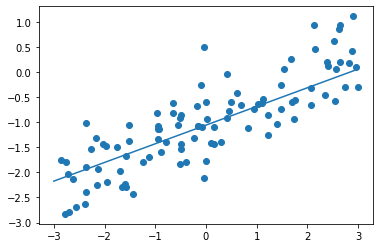

In [11]:
plt.scatter(X, y)
plt.plot(X_test, p_test);

In [12]:
# Check the learned parameters
model.layers

In [13]:
model.layers[1].get_weights()

[array([[0.37319237]], dtype=float32), array([-1.0536109], dtype=float32)]